## 5.- How to plot a histogram

In [5]:
def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(f'{symbol}.csv', index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

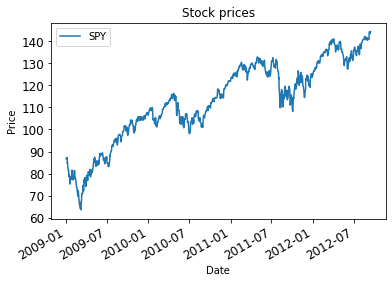

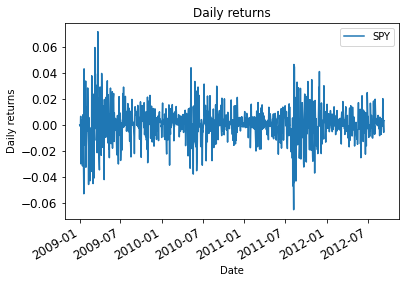

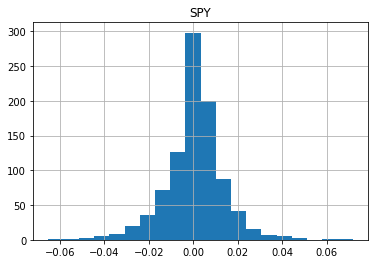

In [12]:
"""Plot a histogram"""
import pandas as pd
import matplotlib.pyplot as plt

#from util import get_data, plot_data

def compute_daily_returns(df):
  """Compute and return the daily return values"""
  daily_returns = df.copy()
  daily_returns[1:] = (df[1:] / df[:-1].values) - 1
  daily_returns.iloc[0, :] = 0 # set daily returns for row 0 to 0
  return daily_returns


def test_run():
  # Read data
  dates = pd.date_range('2009-01-01', '2012-12-31')
  symbols = ['SPY']
  df = get_data(symbols, dates)
  plot_data(df)

  # Compute daily returns
  daily_returns = compute_daily_returns(df)
  plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

  # Plot a histogram
  daily_returns.hist(bins = 20)
  plt.show()


if __name__ == "__main__":
  test_run()